# Regressão Linear

A Regressão Linear é usada quando as variáveis possuem forte correlação. Ela é usada quando as variáveis podem ser
demonstradas pela equação abaixo.Sendo alpha o intecepto do eixo y e beta a inclinação da reta.Devemos levar em conta também um possível erro, que será somado ao resultado da equação. A escolha de alpha e beta é feita de forma com que se tenha o menor erro possível entre a predição e o valor real. Esse erro pode ser medido pela Raiz do Erro Quadrático Médio (RMSE) ou o Erro Quadrático Médio (MSE).

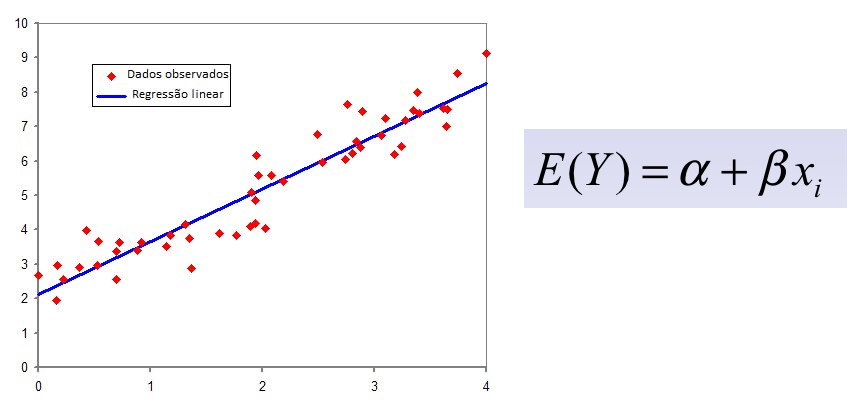

In [1]:
from IPython.display import Image
Image(filename = "/home/jfs/Imagens/regrgraf.png", width = 800, height = 800 )

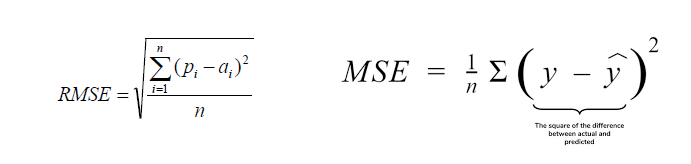

In [2]:
Image(filename = "/home/jfs/Imagens/rmse.png", width = 800, height = 800 )

In [3]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
#Importando o dataset da bolsa de valores
data = pd.read_csv('/home/jfs/Documentos/Dropbox/IA/Minerando/RegrLinear/petr4.csv')

In [5]:
#Verificando as 5 primeiras linhas
data.head()

,Date,Open,High,Low,Close,Volume
0,11-Apr-17,14.97,14.99,14.55,14.68,38392300
1,10-Apr-17,14.90,14.94,14.70,14.94,37541700
2,7-Apr-17,14.61,14.90,14.60,14.70,32944900
3,6-Apr-17,14.62,14.87,14.42,14.53,34386000
4,5-Apr-17,15.05,15.16,14.50,14.57,49623400


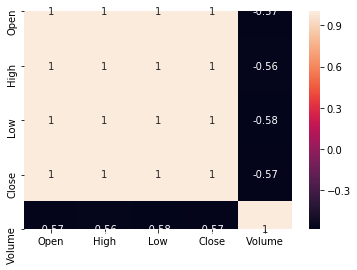

In [6]:
#Verificando a correlação dos dados
corr = data.corr()
sns.heatmap(corr, annot=True)

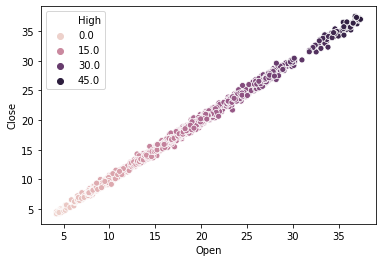

In [7]:
#Verificando o comportamento linear entre os valores de abertura e fechamento da ação.
sns.scatterplot(x = data.Open , y = data.Close, hue = data.High)

# Regressão Linear com StatsModel

Observamos que há uma correlação entre os dados, portanto a regressão linear seria uma boa escolha para predição de valor da ação.
Primeiro vamos construir um modelo utilizando o módulo Statsmodel do python.

In [8]:
results = smf.ols('Close ~ Open', data=data).fit()

In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 6.408e+05
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:41:22   Log-Likelihood:                -782.27
No. Observations:                1802   AIC:                             1569.
Df Residuals:                    1800   BIC:                             1580.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0200      0.025      0.810      0.4

In [10]:
# Imprimindo os Parâmetros
#Com esses parâmetros podemos construir a equação da regressão e predizer os valores de fechamentos futuros.
print (results.params)

Intercept    0.019984
Open         0.997300
dtype: float64


In [11]:
# Gerando os valores previstos
valores_previstos = results.predict(data.Open)
valores_previstos

0       14.949564
1       14.879753
2       14.590536
3       14.600509
4       15.029348
          ...    
1797    37.079649
1798    37.189352
1799    36.720622
1800    37.299055
1801    36.870217
Length: 1802, dtype: float64

# Gerando um ScatterPlot com a Linha de Regressão

In [12]:
# Range de valores para x e y
x_range = [data['Open'].min(),data['Open'].max()]
y_range = [data['Close'].min(),data['Close'].max()]

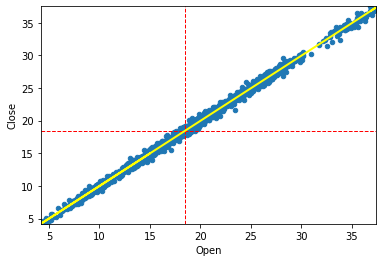

In [13]:
# Primeira camada do Scatter Plot
scatter_plot = data.plot(kind = 'scatter', x = 'Open', y = 'Close', xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [data['Close'].mean(),data['Close'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([data['Open'].mean(),data['Open'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(data['Open'], valores_previstos, '-', color = 'yellow', linewidth = 2)

# Regressão Linear com Scikit-Learn

In [14]:
from sklearn.linear_model import LinearRegression

# Define os valores de x e y
num_observ = len(data)
X = data['Open'].values.reshape((num_observ, 1)) # X deve sempre ser uma matriz e nunca um vetor
y = data['Close'].values # y pode ser um vetor
reg = LinearRegression().fit(X, y)


In [15]:
reg.score(X, y)


0.9971987529198574

In [16]:
# Imprime os coeficientes beta e alpha
print (reg.coef_)
print (reg.intercept_)

[0.99729992]
0.01998430861780065


In [17]:
# Gerando os valores previstos
valores_previstos2 = reg.predict(X)
valores_previstos2

array([14.94956417, 14.87975318, 14.5905362 , ..., 36.72062151,
       37.29905547, 36.8702165 ])

# Gerando as linhas de regressão com StatsModel e com Sklearn em um mesmo gráfico

In [18]:
# Range de valores para x e y
x_range = [data['Open'].min(),data['Open'].max()]
y_range = [data['Close'].min(),data['Close'].max()]

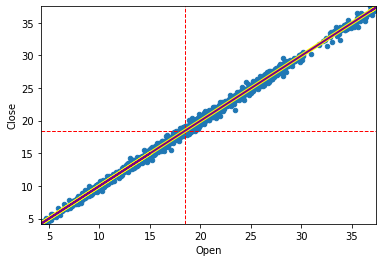

In [19]:
# Primeira camada do Scatter Plot
scatter_plot = data.plot(kind = 'scatter', x = 'Open', y = 'Close', xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [data['Close'].mean(),data['Close'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([data['Open'].mean(),data['Open'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(data['Open'], valores_previstos, '-', color = 'yellow', linewidth = 4)

# Quarta camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(data['Open'], valores_previstos2, '-', color = 'purple', linewidth = 2)

Com esses modelo podemos prever o valor das ações da bolsa!!!Trata-se de um modelo simples que, em casos 
específicos, pode ser perfeitamente viável.